In [1]:
from pydicom import dcmread

In [2]:
import numpy as np


In [3]:
def affine2d(ds):
    F11, F21, F31 = ds.ImageOrientationPatient[3:]
    F12, F22, F32 = ds.ImageOrientationPatient[:3]

    dr, dc = ds.PixelSpacing
    Sx, Sy, Sz = ds.ImagePositionPatient

    return np.array(
        [
            [F11 * dr, F12 * dc, 0, Sx],
            [F21 * dr, F22 * dc, 0, Sy],
            [F31 * dr, F32 * dc, 0, Sz],
            [0, 0, 0, 1]
        ]
    )

In [4]:
a = dcmread("/home/vision/adata_volume_02/breast-cancer-detection/models_backend/densemass/dcm_input/100026249_20201015_L_CC.dcm")

In [5]:
res = affine2d(a)

AttributeError: 'FileDataset' object has no attribute 'ImageOrientationPatient'

In [4]:
import nibabel as nib
import nibabel.nicom.dicomwrappers

/tmp/ipykernel_106903/2751672732.py:2: UserWarning: The DICOM readers are highly experimental, unstable, and only work for Siemens time-series at the moment
Please use with caution.  We would be grateful for your help in improving them
  import nibabel.nicom.dicomwrappers


In [11]:
img = nibabel.nicom.dicomwrappers.wrapper_from_file("/home/vision/adata_volume_02/breast-cancer-detection/tmp/9eaa3034-b09d-4e84-a18f-0e00f7c09e04.dcm")
data = img.get_data()
print(data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
print(img.image_position)

None


In [21]:
import os

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import dicom2nifti

import shutil
import tempfile

def dcm2nii(MRI_dcm_path, nii_out_path):
    dicom2nifti.convert_directory(MRI_dcm_path, "test/", reorient_nifti=True)

In [23]:
dcm2nii("/home/vision/adata_volume_02/breast-cancer-detection/models_backend/densemass/dcm_input/", "/home/vision/adata_volume_02/breast-cancer-detection/test")

IndexError: list index out of range

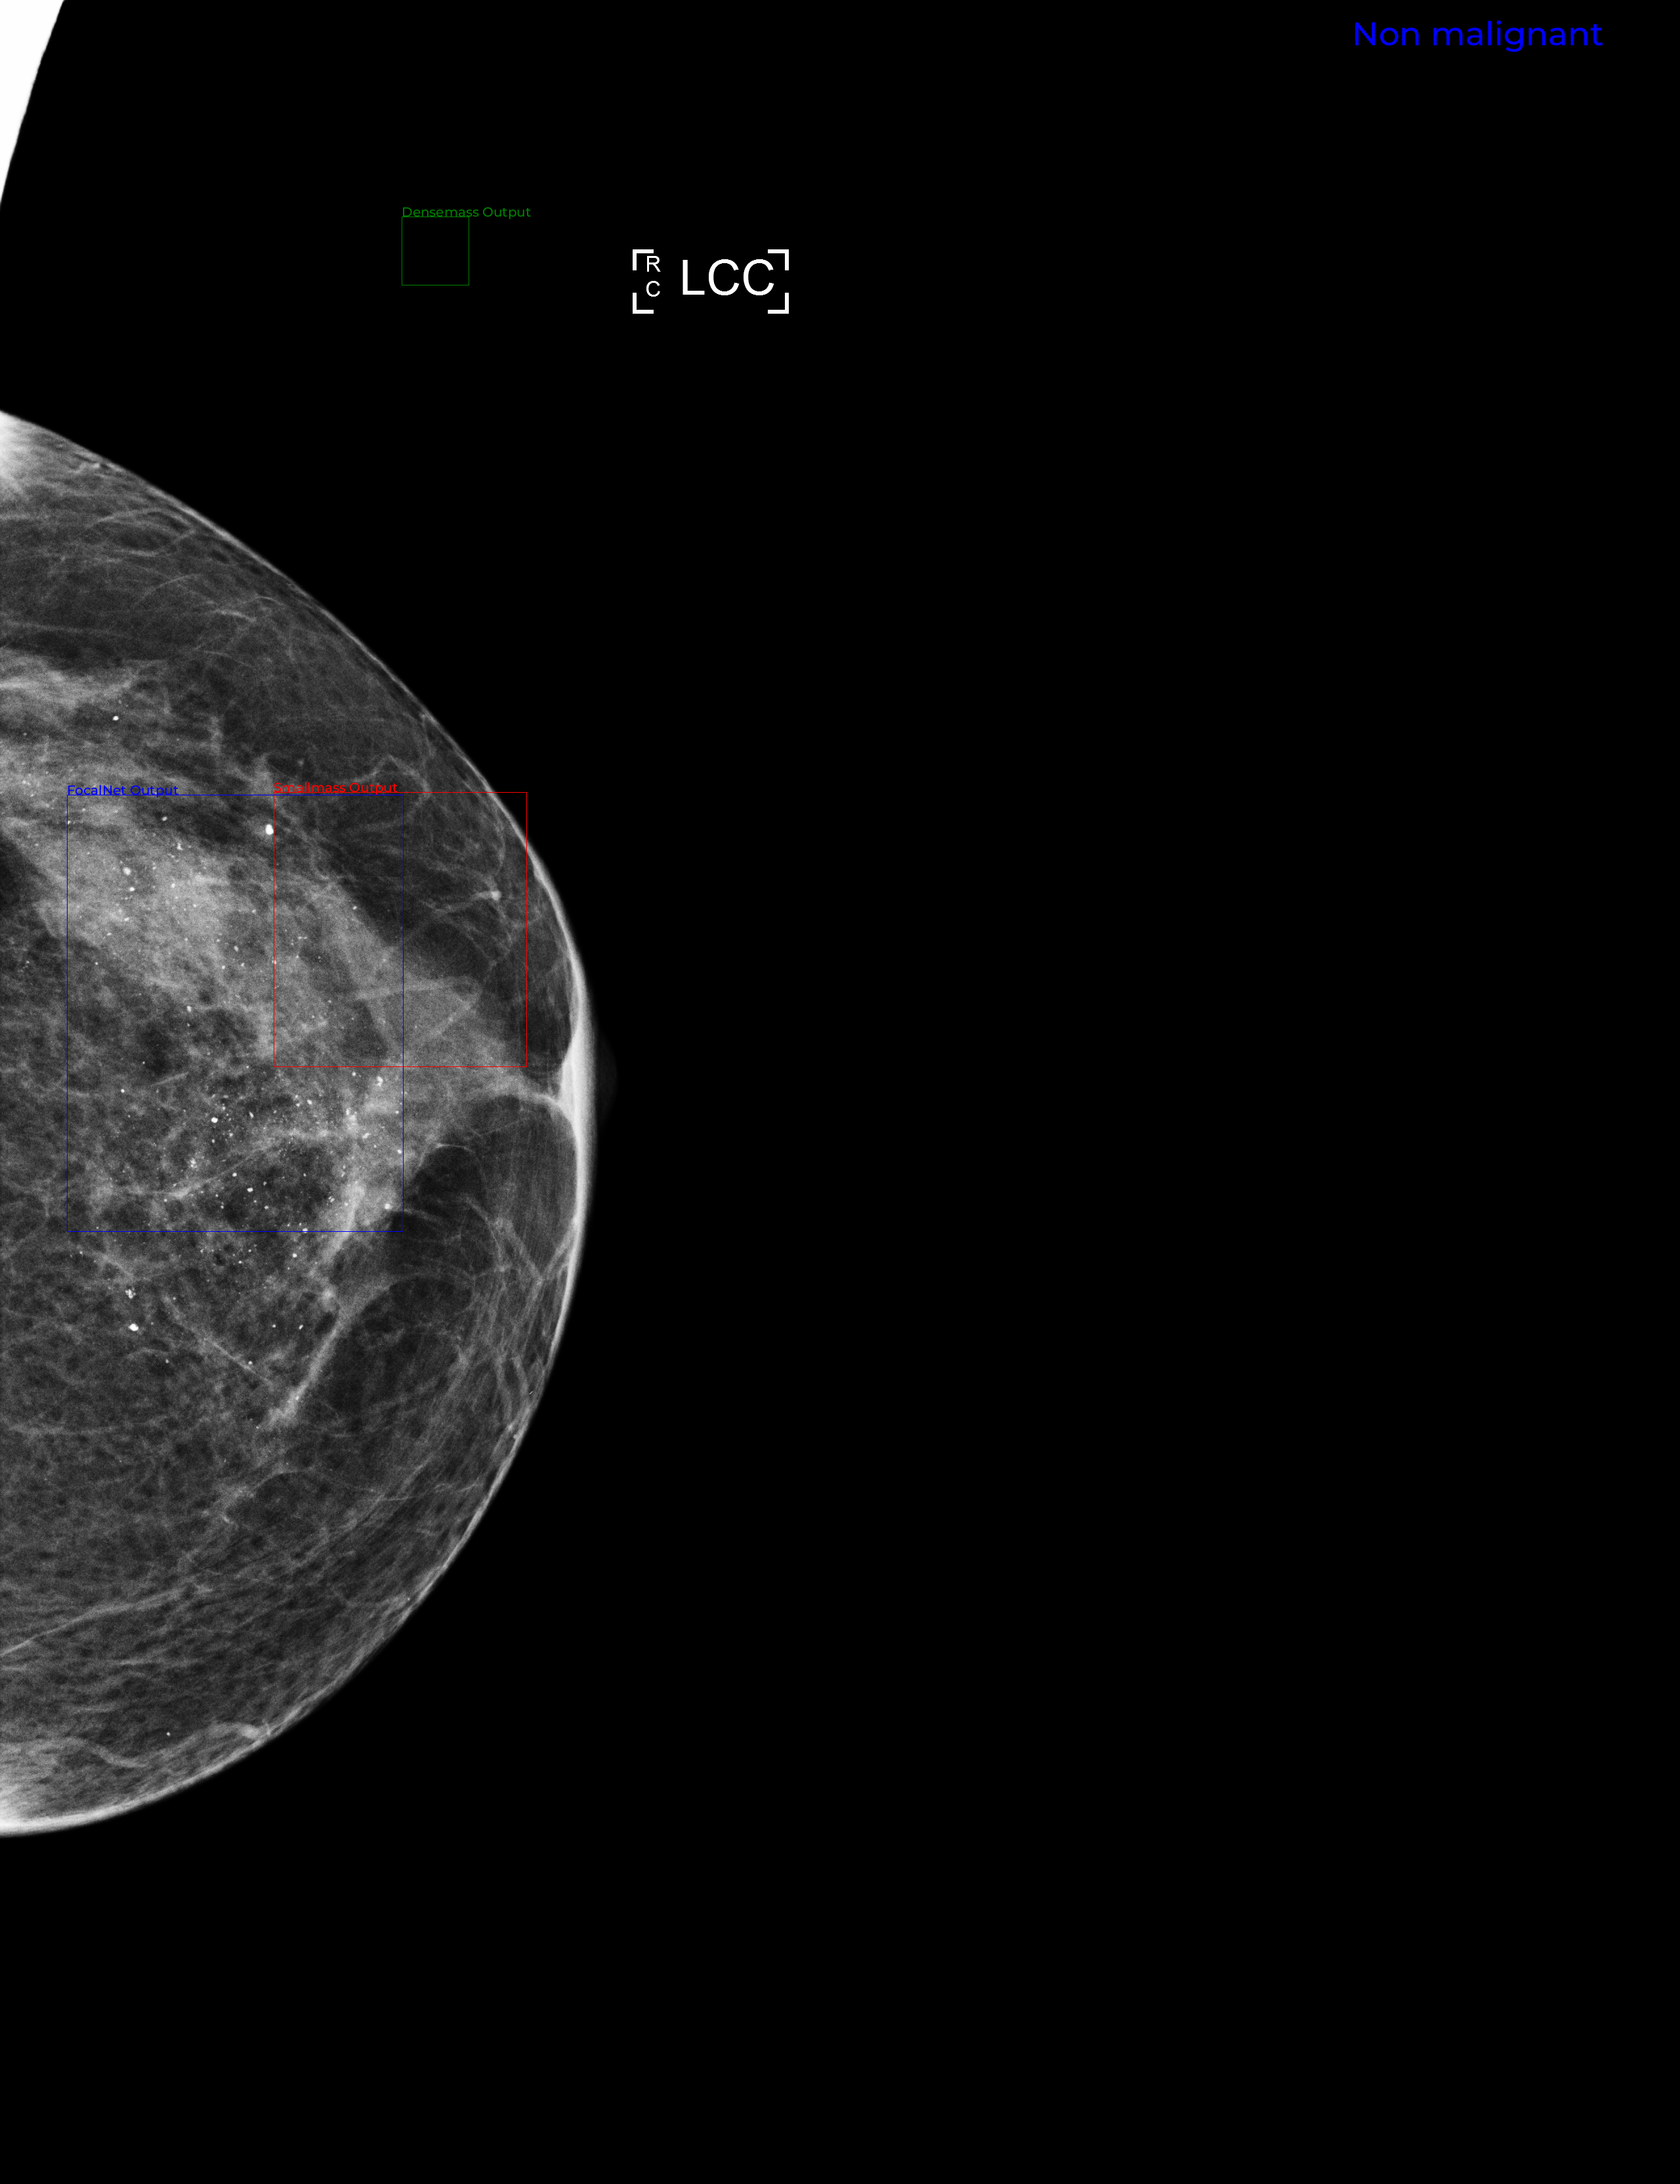

In [19]:
from PIL import Image
from io import BytesIO
import base64
import json

res = json.load(open("res.json"))
im = Image.open(BytesIO(base64.b64decode(res["message"]["L CC"]["img"].replace("data:image/png;base64,", ""))))
im